In [ ]:
import pandas as pd
df= pd.read_csv('Income Data.csv')
df

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80
...,...,...
295,38300.0,46.10
296,27400.0,44.15
297,54200.0,28.25
298,41800.0,44.85


In [ ]:
df.head(10)

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80
5,19800.0,41.45
6,51500.0,31.55
7,39900.0,48.20
8,13000.0,36.80
9,31900.0,43.05


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline

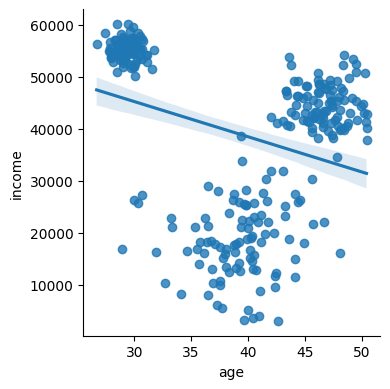

In [ ]:
sn.lmplot(x="age", y="income", data=df, fit_reg=True, height=4)

In [ ]:
from sklearn.cluster import KMeans
cluster = KMeans(3)
cluster.fit(df )


KMeans(n_clusters=3)

In [ ]:
df["clusterid"]= cluster.labels_
df

,income,age,clusterid
0,41100.0,48.75,0
1,54100.0,28.10,2
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1
...,...,...,...
295,38300.0,46.10,0
296,27400.0,44.15,1
297,54200.0,28.25,2
298,41800.0,44.85,0


In [ ]:
df[0:5]

,income,age,clusterid
0,41100.0,48.75,0
1,54100.0,28.10,2
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1


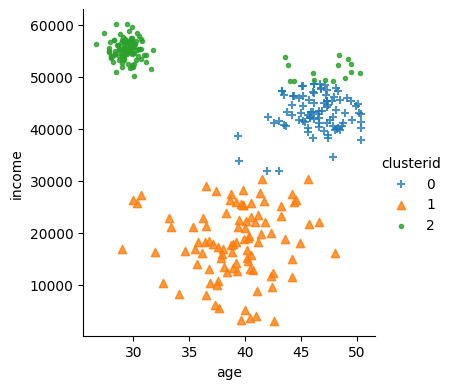

In [ ]:
markers=['+', '^', '.']
sn.lmplot(x="age", y="income", data=df, hue='clusterid', fit_reg=False, markers=markers, height=4)

# **Normalizing Features**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['age', 'income']])
scaled_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [ ]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_df)
df["clusterid_new"] = clusters_new.labels_

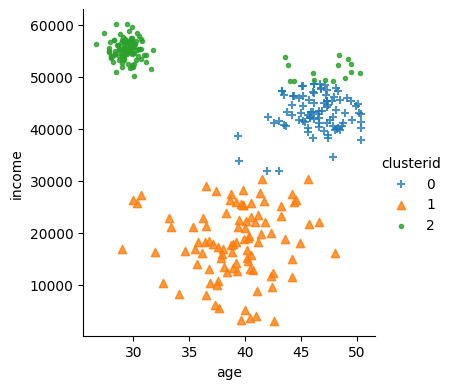

In [ ]:
markers=['+', '^', '.']
sn.lmplot(x="age", y="income", data=df, hue='clusterid', fit_reg=False, markers=markers, height=4)

In [ ]:
cluster.cluster_centers_


array([[4.30539326e+04, 4.64191011e+01],
       [1.81447917e+04, 3.91744792e+01],
       [5.46756522e+04, 3.17004348e+01]])

# Creating product segmentation using clustering

In [ ]:
beer_df = pd.read_csv('beer.csv')
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(beer_df[['calories', 'sodium', 'alcohol', 'cost']])
scaled_df

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

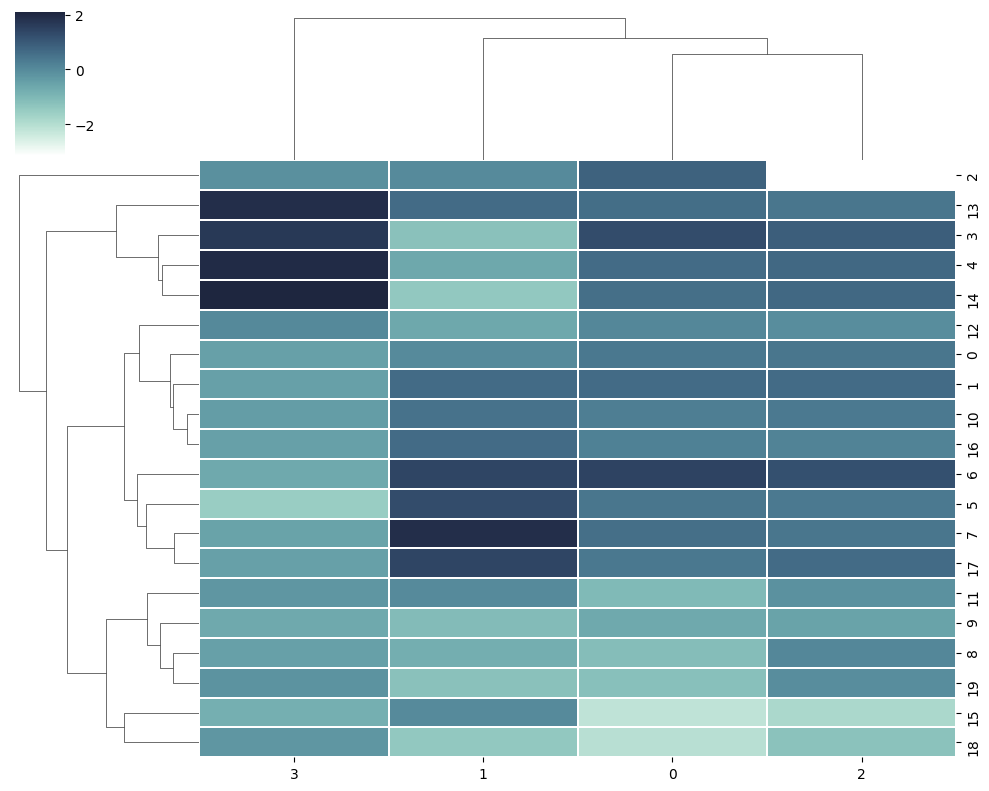

In [ ]:
import seaborn as sn
cmap = sn.cubehelix_palette(as_cmap=True, rot=-0.3, light=1)
sn.clustermap(scaled_df, cmap=cmap, linewidth=.2, figsize=(10,8))

In [ ]:
beer_df.iloc[[10, 16]]

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


In [ ]:
beer_df.iloc[[2, 18]]

,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


Text(0, 0.5, 'Cluster errors')

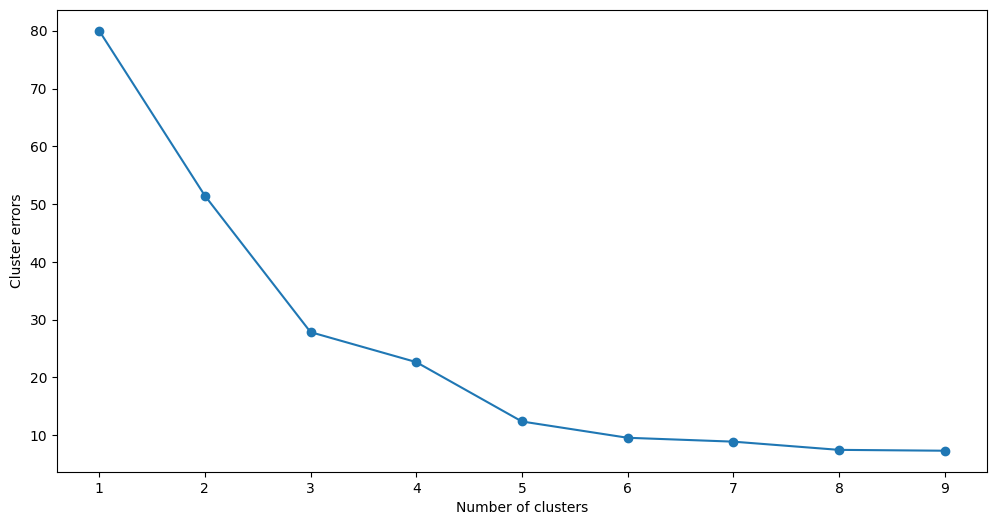

In [ ]:
cluster_range = range(1, 10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(12,6))
plt.plot(cluster_range, cluster_errors, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster errors')

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(beer_df[['calories', 'sodium', 'alcohol', 'cost']])

In [ ]:
k =3
clusters = KMeans(k, random_state =40)
clusters.fit(scaled_df)
beer_df["clusterid"] = clusters.labels_

In [ ]:
beer_df[beer_df["clusterid"]==0]

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,0
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
12,Michelob_Light,135,11,4.2,0.50,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
19,Schlitz_Light,97,7,4.2,0.47,0


In [ ]:
beer_df[beer_df["clusterid"]==1]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


In [ ]:
beer_df[beer_df["clusterid"]==2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


HIERARCHICAL CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering
h_clusters= AgglomerativeClustering(3)
h_clusters.fit(scaled_df)
beer_df["h_clusterid"] = h_clusters.labels_

In [ ]:
beer_df[beer_df["h_clusterid"]==0]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
2,Lowenbrau,157,15,0.9,0.48,0,0
8,Miller_Lite,99,10,4.3,0.43,0,0
9,Budweiser_Light,113,8,3.7,0.40,0,0
11,Coors_Light,102,15,4.1,0.46,0,0
12,Michelob_Light,135,11,4.2,0.50,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0,0
19,Schlitz_Light,97,7,4.2,0.47,0,0


In [ ]:
beer_df[beer_df["h_clusterid"]==1]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,1,1
1,Schlitz,151,19,4.9,0.43,1,1
5,Old_Milwaukee,145,23,4.6,0.28,1,1
6,Augsberger,175,24,5.5,0.40,1,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,1
10,Coors,140,18,4.6,0.44,1,1
16,Hamms,139,19,4.4,0.43,1,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1,1


In [ ]:
beer_df[beer_df["h_clusterid"]==2]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
3,Kronenbourg,170,7,5.2,0.73,2,2
4,Heineken,152,11,5.0,0.77,2,2
13,Becks,150,19,4.7,0.76,2,2
14,Kirin,149,6,5.0,0.79,2,2


In [ ]:
df = pd.read_csv("customerspends.csv")
df

,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.70
1,2,15.23,5.50
2,3,5.22,18.60
3,4,31.10,1.80
4,5,6.12,21.50
5,6,14.50,8.20
6,7,8.50,16.20
7,8,26.50,2.20
8,9,4.34,17.70
9,10,13.75,7.30


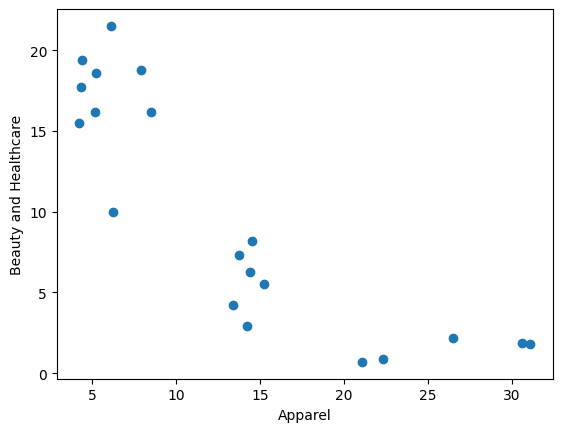

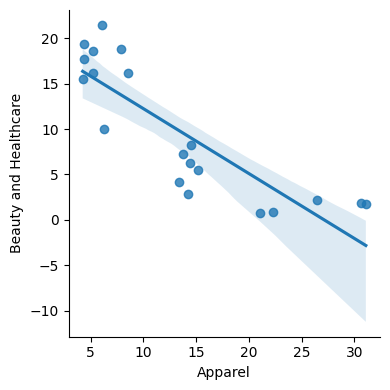

In [ ]:
plt.scatter(df['Apparel'], df['Beauty and Healthcare'])
plt.xlabel('Apparel')
plt.ylabel('Beauty and Healthcare')
plt.show()
sn.lmplot(x="Apparel", y="Beauty and Healthcare", data=df, fit_reg=True, height=4)

In [ ]:
features = df[['Apparel', 'Beauty and Healthcare']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)
df["clusterid"] = kmeans.labels_

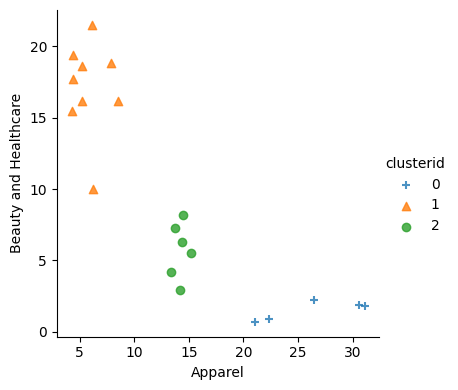

In [ ]:
markers = ['+', '^', 'o']
sn.lmplot(x='Apparel', y='Beauty and Healthcare', data=df, hue = "clusterid", fit_reg=False, markers=markers, height=4)

In [ ]:
cluster_range = range(1, 11)  # Trying from 1 to 10 clusters
inertia = []

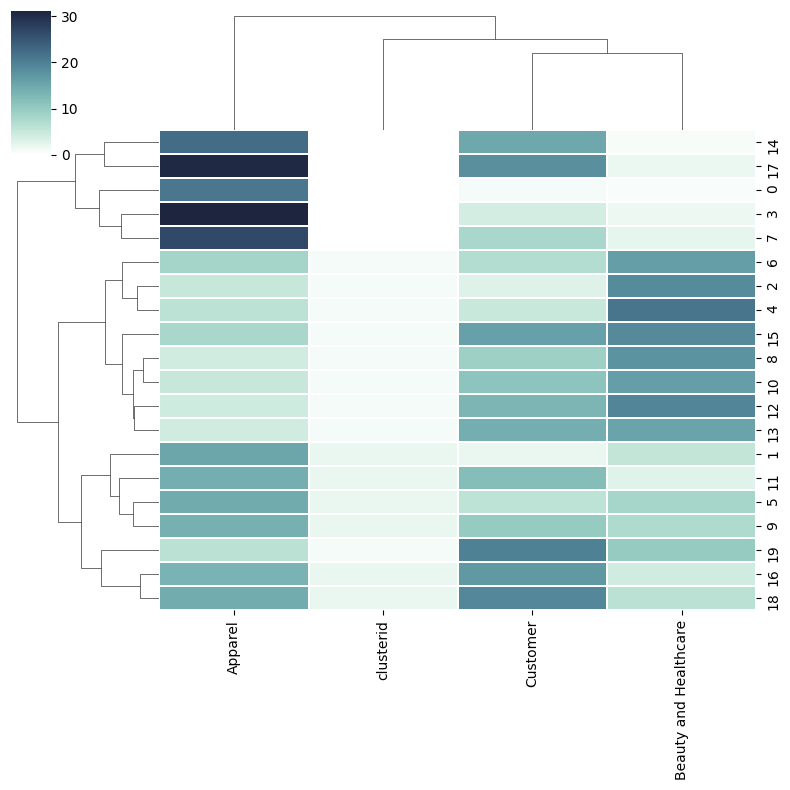

In [ ]:
import seaborn as sn
cmap = sn.cubehelix_palette(as_cmap=True, rot=-0.3, light=1)
sn.clustermap(df, cmap=cmap, linewidth=.2, figsize=(8,8))

Text(0, 0.5, 'Cluster errors')

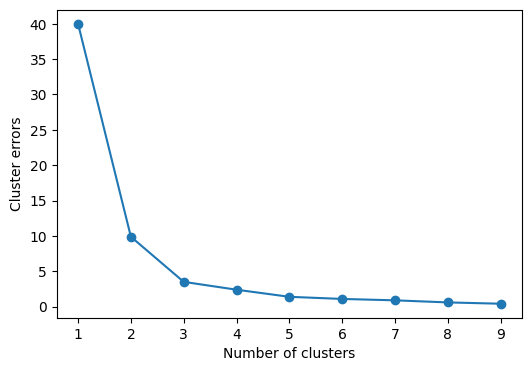

In [ ]:
df_range = range(1, 10)
df_errors = []
for x in df_range:
    clusters = KMeans(x)
    clusters.fit(scaled_features)
    df_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(df_range, df_errors, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster errors')

In [ ]:
#tranformer architecture
#transformer application

SyntaxError: invalid syntax (<ipython-input-1-349e21672fd1>, line 1)